In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [69]:
file = "E-commerce_data.xlsx"
excel_data = pd.ExcelFile(file)

customers_df = pd.read_excel(excel_data, sheet_name='customers')
genders_df = pd.read_excel(excel_data, sheet_name='genders')
cities_df = pd.read_excel(excel_data, sheet_name='cities')
transactions_df = pd.read_excel(excel_data, sheet_name='transactions')
branches_df = pd.read_excel(excel_data, sheet_name='branches')
merchants_df = pd.read_excel(excel_data, sheet_name='merchants')

print(customers_df.head())
print(genders_df.head())
print(cities_df.head())
print(transactions_df.head())
print(branches_df.head())
print(merchants_df.head())


   customer_id  join_date  city_id  gender_id
0            1 2022-01-08        7          1
1            2 2023-05-02       20          2
2            3 2023-05-14       15          1
3            4 2022-11-25       11          2
4            5 2023-04-26        8          1
   gender_id gender_name
0          1        Male
1          2      Female
   city_id         city_name
0        1             Cairo
1        2        Alexandria
2        3              Giza
3        4  Shubra El-Kheima
4        5         Port Said
   transaction_id  customer_id transaction_date transaction_status  \
0               1          733       2024-05-11         subscribed   
1               2          631       2023-05-15             burned   
2               3          309       2022-11-13         subscribed   
3               4          695       2024-01-26         subscribed   
4               5          288       2022-10-12             burned   

  coupon_name  burn_date  branch_id  
0     uNY-568   

In [70]:
customer_data = customers_df.merge(transactions_df, on='customer_id')
customer_data = customer_data.merge(cities_df, on='city_id')
customer_data = customer_data.merge(genders_df, on='gender_id')

transaction_summary = transactions_df.groupby('customer_id').agg({
    'transaction_id': 'count',
    'transaction_status': lambda x: (x == 'burnt').sum()
}).reset_index()

customer_data = customers_df.merge(transaction_summary, on='customer_id')

features = customer_data[['transaction_id', 'transaction_status', 'city_id', 'gender_id']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


C:\Users\G5\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\G5\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\G5\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\G5\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

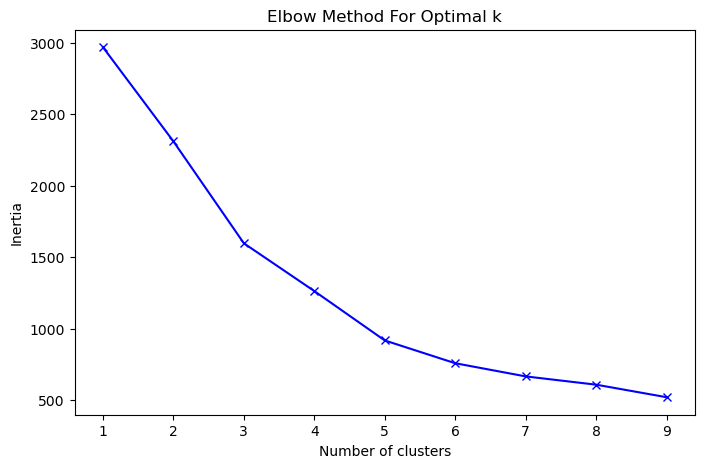

In [71]:
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [72]:
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.18236998855304615


     customer_id  cluster
0              1        1
1              2        0
2              3        0
3              4        2
4              5        2
..           ...      ...
984          996        1
985          997        0
986          998        2
987          999        1
988         1000        1

[989 rows x 2 columns]


C:\Users\G5\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


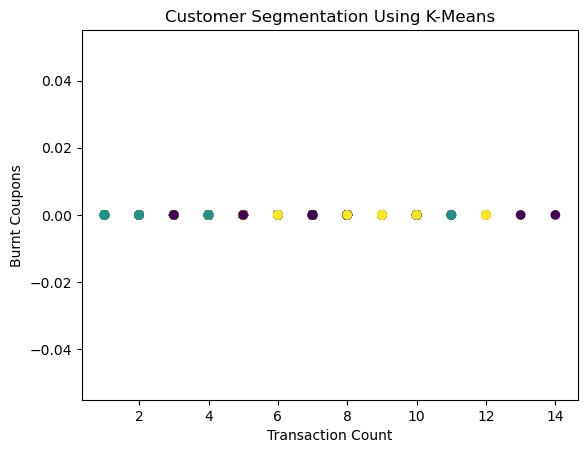

In [73]:
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['cluster'] = kmeans.fit_predict(features)

print(customer_data[['customer_id', 'cluster']])

plt.scatter(customer_data['transaction_id'], customer_data['transaction_status'], c=customer_data['cluster'], cmap='viridis')
plt.title('Customer Segmentation Using K-Means')
plt.xlabel('Transaction Count')
plt.ylabel('Burnt Coupons')
plt.show()


In [74]:
group_analysis = customer_data.groupby('cluster').agg({
    'transaction_id': 'mean',
    'transaction_status': 'mean'
}).reset_index()

print(group_analysis)


   cluster  transaction_id  transaction_status
0        0        5.006897                 0.0
1        1        5.079787                 0.0
2        2        5.071207                 0.0
